In [6]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from fit_funcs import *
import costfun.costfun as cost
import utils.figures as fig_help
import utils.tools as tools
# from RandomMatrixTheory import goe

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import gamma as Gamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists

DIM = 1
modello = 'FreeFermions'


def base_dir(model, d, BC = 0):
    """
    Base directory for input model for d-dimension
    """
    dirx = f"../results/{model}/" + (f"" if model == 'PLRB' else  f"dim={d}/") + (f"PBC/" if BC else f"OBC/") 
    return dirx

print(base_dir(modello, DIM))

/Users/rafal.swietek/Projects/CODES/QHamSolver/Quadratic/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
../results/FreeFermions/dim=1/OBC/


In [7]:

def order_of_magnitude2(a_value):
    #return 2
    if np.abs(a_value) < 1.0 and a_value != 0:
        m = np.abs(np.log10(np.abs(a_value)))
        return int(max(math.ceil(m) + 1., 2.))
    else: 
        return 2

def order_of_magnitude(a_value):
    x = a_value - int(a_value)
    x = np.round(x, 8)
    num_str = f"{x}"
    num_str = num_str[2:]
    _size = len(num_str)
    if num_str == "0":
        _size = 0;
    
    return _size
    
def info_raw(L, J, w, g, model = 'Anderson', use_old = False):
    
    names = ['J', 'g', 'w'] if model == 'PLRB' else ['J', 'w', 'g']
    arr = [J]
    if model == 'Anderson' or model == 'AubryAndre': arr.append(w)
    if model == 'AubryAndre' or model == 'PLRB': arr.append(g)
    
    info = "_L=%d"%(L)
    for i, var in enumerate(arr):
        n = order_of_magnitude2(var) if use_old else order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info

def info(L, J=1.0, w=0.0, g=0.0, use_old = False, model = 'Anderson', ext = '.dat'):
    return info_raw(L, J, w, g, model, use_old) + ext


def GOE(x : np.array):
    """
    GOE shape of sff in thermodynamic limit
    
    Parameters:
    -----------------
        x : np.array
            numpy array with datapoints (times defined for unfolded data)
    """
    return np.array([2 * a - a * np.log(1 + 2 * a) if a < 1 else 2 - a * np.log( (2 * a + 1) / (2 * a - 1) ) for a in x])

def remove_fluctuations(data, bucket_size=10):
    new_data = data;
    half_bucket = int(bucket_size / 2)
    for k in range(half_bucket, len(data) - half_bucket):
        average = np.sum(data[k - half_bucket : k + half_bucket])
        new_data[k - half_bucket] = average / bucket_size
    return new_data


def page(L_a, L_b):
    # return L_a * np.log(2)
    d_a = 2**L_a
    d_b = 2**L_b
    print(d_a, L_a)
    print(d_b, L_b)
    return digamma(d_a * d_b + 1) - digamma(max(d_a, d_b) + 1) - (min(d_a, d_b) - 1) / (2 * max(d_a, d_b))

../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=1000,J=1,w=0.5,g=0.618034.hdf5
54412
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=1728,J=1,w=0.5,g=0.618034.hdf5
56740
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=2744,J=1,w=0.5,g=0.618034.hdf5
94745
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=4096,J=1,w=0.5,g=0.618034.hdf5
88034
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=5832,J=1,w=0.5,g=0.618034.hdf5
79961
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=8000,J=1,w=0.5,g=0.618034.hdf5
71177
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=10648,J=1,w=0.5,g=0.618034.hdf5
64186
../results/AubryAndre/dim=1/OBC/DiagonalMatrixElements/ManyBody/RandomChoice/_L=13824,J=1,w=0.5,g=0.618034.hdf5
4999


No handles with labels found to put in legend.


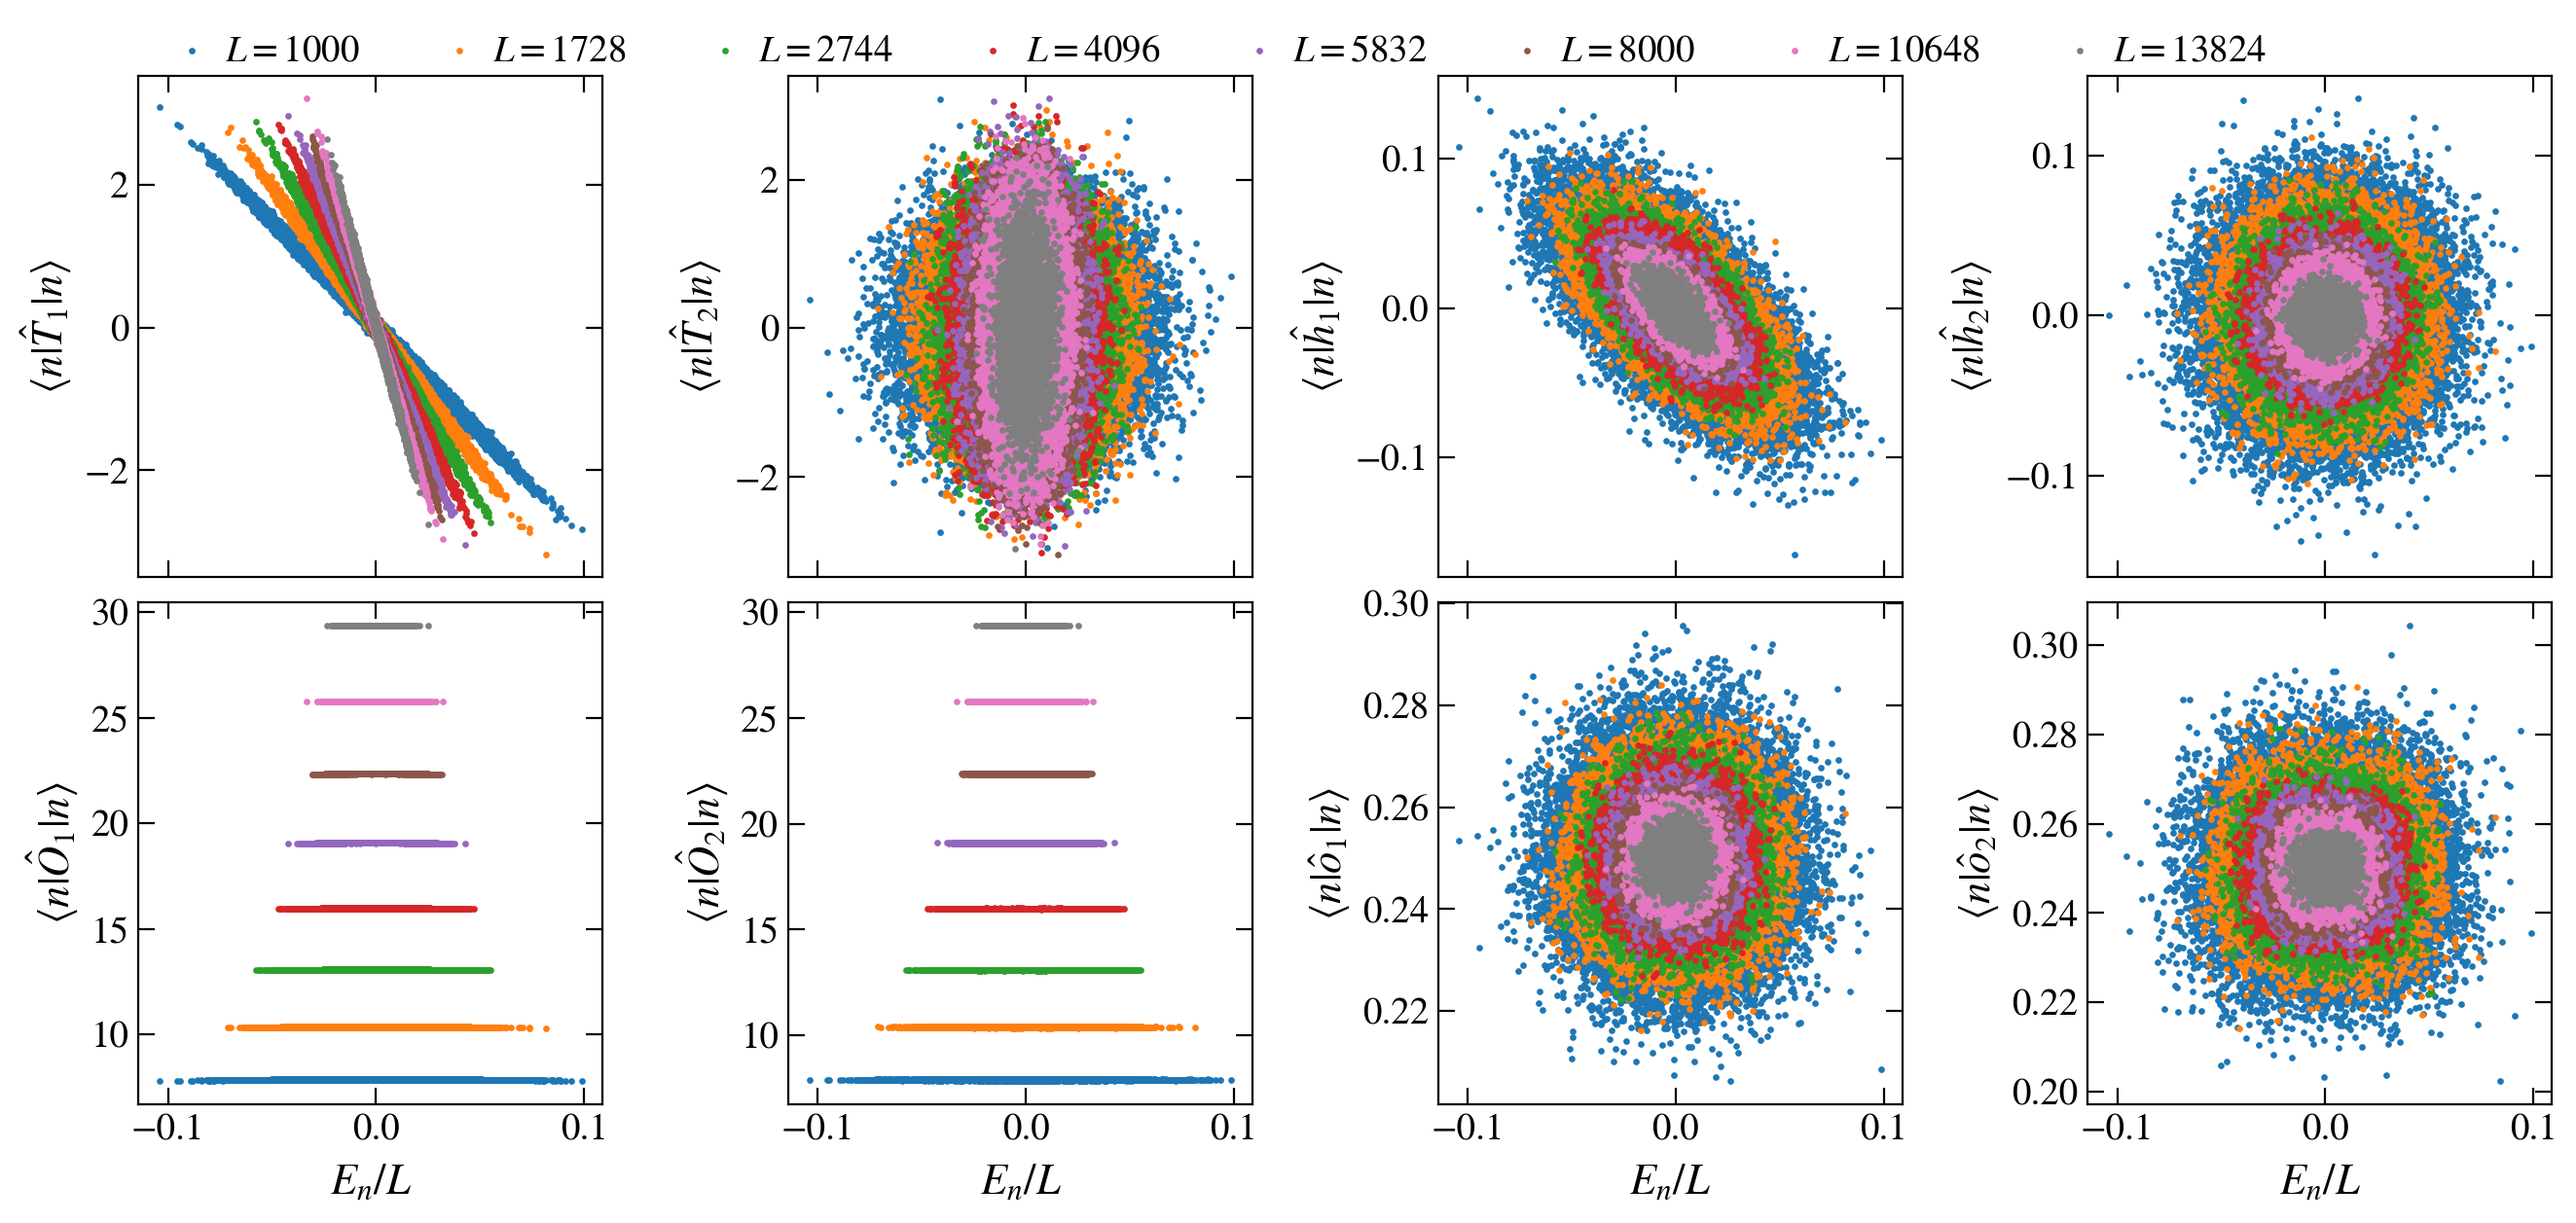

In [10]:
fig, axes = plt.subplots( nrows=2, ncols=4, figsize=(16,7), dpi = 200, sharex=True)

axis_top = axes[0, :]
axis_bot = axes[1, :]
# axis_bot[-1].axis('off')


L=100
J=1
w=0.5
g=0.618034
op=1
model = 'AubryAndre'
DIM=1
BC=0


prefix = base_dir(model=model, d=DIM, BC  = BC) + 'DiagonalMatrixElements/ManyBody/'
if op == 2:   prefix += "AllStates/"
else:         prefix += "RandomChoice/"

REMOVE_STRUCTURE = 0
window = 50

sizes2 = [100, 500, 1000, 2000, 5000, 10000, 16000, 24000]
sizes2 = np.arange(10, 26, 2)**3
# sizes2 = [20]
for L in sizes2:
    # ks = L//2
    V = L**DIM
    name =  prefix + info(L=L, J=J, w=w, g=g, model =  model, ext=f'.hdf5')
    if exists(name):
        print(name)
        with h5py.File(name, "r") as file:
            E  = np.array(file.get('many-body energy'))
            ind = [np.abs(E) < 5 * V]
            T_nn_tmp      = np.array(file.get('T_nn'))[ind]# - E[ind] / np.sqrt(V)
            T_nnn_tmp     = np.array(file.get('T_nnn'))[ind]
            T_nn_loc_tmp  = np.array(file.get('T_nn_loc'))[ind]
            T_nnn_loc_tmp = np.array(file.get('T_nnn_loc'))[ind]
            U_nn_tmp      = np.array(file.get('U_nn'))[ind]
            U_nnn_tmp     = np.array(file.get('U_nnn'))[ind]
            U_nn_loc_tmp  = np.array(file.get('U_nn_loc'))[ind]
            U_nnn_loc_tmp = np.array(file.get('U_nnn_loc'))[ind]
            m0_tmp        = np.array(file.get('m0'))[ind]
            E = E[ind]
            print(E.size)

            permut = np.argsort(E[ind])
            if REMOVE_STRUCTURE:
                T_nn_tmp      = tools.get_fluctuations(T_nn_tmp[permut]     , bucket_size=window, type='mean')
                T_nnn_tmp     = tools.get_fluctuations(T_nnn_tmp[permut]    , bucket_size=window, type='mean')
                T_nn_loc_tmp  = tools.get_fluctuations(T_nn_loc_tmp[permut] , bucket_size=window, type='mean')
                T_nnn_loc_tmp = tools.get_fluctuations(T_nnn_loc_tmp[permut], bucket_size=window, type='mean')
                U_nn_tmp      = tools.get_fluctuations(U_nn_tmp[permut]     , bucket_size=window, type='mean')
                U_nnn_tmp     = tools.get_fluctuations(U_nnn_tmp[permut]    , bucket_size=window, type='mean')
                U_nn_loc_tmp  = tools.get_fluctuations(U_nn_loc_tmp[permut] , bucket_size=window, type='mean')
                U_nnn_loc_tmp = tools.get_fluctuations(U_nnn_loc_tmp[permut], bucket_size=window, type='mean')
                m0_tmp        = tools.get_fluctuations(m0_tmp[permut]       , bucket_size=window, type='mean')
                
            xx = np.linspace(0, 1, T_nn_tmp.size)
            axis_top[0].scatter(E / V, T_nn_tmp,        s=2, label=r"$L=%d$"%L)
            axis_top[1].scatter(E / V, T_nnn_tmp,       s=2)
            axis_top[2].scatter(E / V, T_nn_loc_tmp,    s=2)
            axis_top[3].scatter(E / V, T_nnn_loc_tmp,   s=2)

            axis_bot[0].scatter(E / V, U_nn_tmp,        s=2, label=r"$L=%d$"%L)
            axis_bot[1].scatter(E / V, U_nnn_tmp,       s=2)
            axis_bot[2].scatter(E / V, U_nn_loc_tmp,    s=2)
            axis_bot[3].scatter(E / V, U_nnn_loc_tmp,   s=2)
            # if L >= sizes[-3]:
            #     hist, edges = np.histogram(energies / L, bins=int(L**2/10), normed=True)
            #     axis_bot[3].stairs(hist, edges, label=r"$L=%d$"%L)
            #     x_min = min(edges)
            #     x_max = max(edges)
    else:
        print(name)

# aa = np.linspace(x_min, x_max, 1000)
# axis_bot[3].plot(aa, 1 / np.sqrt(2*np.pi) * np.exp(-aa**2 / 2), ls='--', c='k')

def make_title(title):
    return r"$|%s-\overline{%s}|$"%(title, title) if REMOVE_STRUCTURE else r"$%s$"%title

scale = 'linear'
fig_help.set_plot_elements(axis_top[0], ylabel=r"$\langle n|\hat{T}_1|n\rangle$", xlabel="", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_top[1], ylabel=r"$\langle n|\hat{T}_2|n\rangle$", xlabel="", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_top[2], ylabel=r"$\langle n|\hat{h}_1|n\rangle$", xlabel="", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_top[3], ylabel=r"$\langle n|\hat{h}_2|n\rangle$", xlabel="", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_bot[0], ylabel=r"$\langle n|\hat{O}_1|n\rangle$", xlabel=r"$E_n/L$", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_bot[1], ylabel=r"$\langle n|\hat{O}_2|n\rangle$", xlabel=r"$E_n/L$", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_bot[2], ylabel=r"$\langle n|\hat{o}_1|n\rangle$", xlabel=r"$E_n/L$", font_size=14, set_legend=False, yscale=scale)
fig_help.set_plot_elements(axis_bot[3], ylabel=r"$\langle n|\hat{o}_2|n\rangle$", xlabel=r"$E_n/L$", font_size=14, set_legend=False, yscale=scale)

axis_top[0].legend(frameon=0, fontsize=14, loc='upper left', ncol=8, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01, 1.15))
axis_bot[3].legend(frameon=0, fontsize=14, loc='upper left', ncol=1, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01, 1.02))

# for ax in axis_top:
#     ax.set_ylim(-0.003, 0.003)
# for ax in axis_bot:
#     ax.set_ylim(-0.003, 0.003)
fig.subplots_adjust(wspace = 0.4, hspace=0.05)

In [8]:

model = 'FreeFermions'
J=1
w=0.5
g=0.2
DIM=1
BC=0
op=1


prefix = base_dir(model=model, d=DIM, BC  = BC) + 'DiagonalMatrixElements/ManyBody/'
if op == 2:   prefix += "AllStates/"
else:         prefix += "RandomChoice/"

sizes = np.array([100, 500, 1000, 2000, 5000, 10000, 16000, 24000])
sizes = np.linspace(10, 22, 7)**3
REMOVE_STRUCTURE = 1
window = 100

# sizes = np.arange(8, 36, 4)
T_nn = np.zeros((sizes.size))
T_nnn = np.zeros((sizes.size))
T_nn_loc = np.zeros((sizes.size))
T_nnn_loc = np.zeros((sizes.size))
U_nn = np.zeros((sizes.size))
U_nnn = np.zeros((sizes.size))
U_nn_loc = np.zeros((sizes.size))
U_nnn_loc = np.zeros((sizes.size))
m0 = np.zeros((sizes.size))
pair_hop = np.zeros((sizes.size))
pair_hop_loc = np.zeros((sizes.size))


def order_and_rm_struct(permut, y):
    y = np.array(y)[permut]
    
    # wind = window if y.size > 2e3 else (50 if y.size > 5e2 else 10)
    y = tools.get_fluctuations(y, bucket_size=window, type='mean')
    return y

# sizes = [12, 24]
for ii_L, L in enumerate(sizes):
    # ks = L//2
    V = L**DIM
    name =  prefix + info(L=L, J=J, w=w, g=g, model = model, ext=f'.hdf5')
    if exists(name):
        # print(name)
        with h5py.File(name, "r") as file:
            E  = np.array(file.get('many-body energy'))
            # ind = [np.abs(E) < 500 * V] if V < 10000 else [np.abs(E) < 100 * V]
            # x = np.array(x)[permut]

            permut = np.argsort(E)
            T_nn_raw      = order_and_rm_struct(permut, np.array(file.get('T_nn')))#  - E[ind] / np.sqrt(V))
            T_nnn_raw     = order_and_rm_struct(permut, np.array(file.get('T_nnn')))
            T_nn_loc_raw  = order_and_rm_struct(permut, np.array(file.get('T_nn_loc')))
            T_nnn_loc_raw = order_and_rm_struct(permut, np.array(file.get('T_nnn_loc')))
            U_nn_raw      = order_and_rm_struct(permut, np.array(file.get('U_nn')))
            U_nnn_raw     = order_and_rm_struct(permut, np.array(file.get('U_nnn')))
            U_nn_loc_raw  = order_and_rm_struct(permut, np.array(file.get('U_nn_loc')))
            U_nnn_loc_raw = order_and_rm_struct(permut, np.array(file.get('U_nnn_loc')))
            m0_raw        = order_and_rm_struct(permut, np.array(file.get('m0')))
            pair_hop_raw        = order_and_rm_struct(permut, np.array(file.get('o3')))
            pair_hop_loc_raw    = order_and_rm_struct(permut, np.array(file.get('o3_loc')))
            
            print(m0_raw.size)
            T_nn[ii_L]      = np.var(T_nn_raw     )
            T_nnn[ii_L]     = np.var(T_nnn_raw    )
            T_nn_loc[ii_L]  = np.var(T_nn_loc_raw )
            T_nnn_loc[ii_L] = np.var(T_nnn_loc_raw)
            U_nn[ii_L]      = np.var(U_nn_raw     )
            U_nnn[ii_L]     = np.var(U_nnn_raw    )
            U_nn_loc[ii_L]  = np.var(U_nn_loc_raw )
            U_nnn_loc[ii_L] = np.var(U_nnn_loc_raw)
            m0[ii_L]        = np.var(m0_raw       )
            pair_hop[ii_L]        = np.var(pair_hop_raw       )
            pair_hop_loc[ii_L]    = np.var(pair_hop_loc_raw       )
    else:
        print(name)

hf = h5py.File(f"variances_{model}.hdf5", 'w')
hf.create_dataset('sizes', sizes.shape, data = sizes)
hf.create_dataset('m0', m0.shape, data = m0)
hf.create_dataset('T1', T_nn.shape, data = T_nn)
hf.create_dataset('T2', T_nnn.shape, data = T_nnn)
hf.create_dataset('h1', T_nn_loc.shape, data = T_nn_loc)
hf.create_dataset('h2', T_nnn_loc.shape, data = T_nnn_loc)
hf.create_dataset('o1', U_nn_loc.shape, data = U_nn_loc)
hf.create_dataset('o2', U_nnn_loc.shape, data = U_nnn_loc)
hf.create_dataset('o3', pair_hop_loc.shape, data = pair_hop_loc)
hf.create_dataset('O1', U_nn.shape, data = U_nn)
hf.create_dataset('O2', U_nnn.shape, data = U_nnn)
hf.create_dataset('O3', pair_hop.shape, data = pair_hop)
hf.close()

np.savetxt(f'variances_{model}_sizes.dat', sizes)
np.savetxt(f'variances_{model}_m0.dat', m0)
np.savetxt(f'variances_{model}_T1.dat', T_nn)
np.savetxt(f'variances_{model}_T2.dat', T_nnn)
np.savetxt(f'variances_{model}_h1_loc.dat', T_nn_loc)
np.savetxt(f'variances_{model}_h2_loc.dat', T_nnn_loc)
np.savetxt(f'variances_{model}_O1.dat', U_nn)
np.savetxt(f'variances_{model}_O2.dat', U_nnn)
np.savetxt(f'variances_{model}_O3.dat', pair_hop)
np.savetxt(f'variances_{model}_o1_loc.dat', U_nn_loc)
np.savetxt(f'variances_{model}_o2_loc.dat', U_nnn_loc)
np.savetxt(f'variances_{model}_o3_loc.dat', pair_hop_loc)



54664
55935
95053
73610
48916
25179
8598


$\hat{h}_1^{\ell=V/2}$ [-1.00053364  0.50088737] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{h}_2^{\ell=V/2}$ [-0.97826862  0.81594429] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{m}_0$ [-0.0062974   0.17339838] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{T}_1$ [3.53357967e+00 7.93165954e-20] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{T}_2$ [0.00645032 0.46468328] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{o}_1^{\ell=V/2}$ [-0.98103132  0.05244579] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{o}_2^{\ell=V/2}$ [-0.99222871  0.05761923] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{o}_3^{\ell=V/2}$ [-1.96842823  0.33059225] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{O}_1$ [-1.94008615  0.29607252] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{O}_2$ [-1.02305206  0.0371356 ] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{O}_3$ [-1.00957551  0.06675499] [ 2744.  4096.  5832.  8000. 10648.]


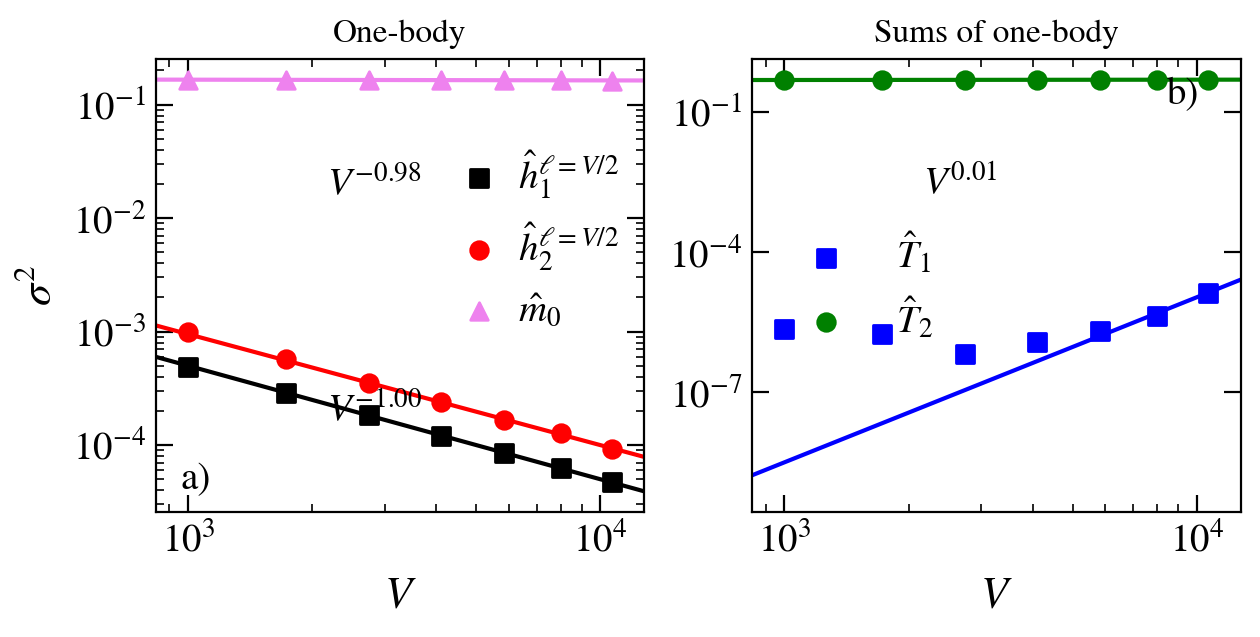

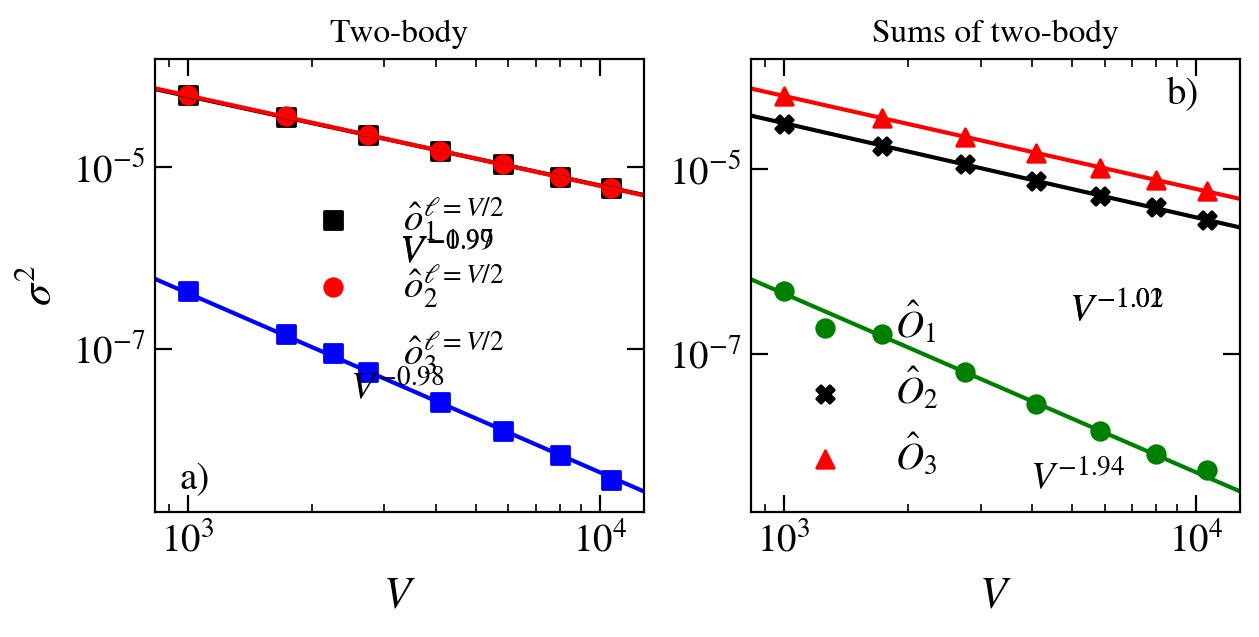

In [9]:
fig1, ax1 = plt.subplots( nrows=1, ncols=2, figsize=(7,3), dpi = 200, sharex=True)#, sharey=True)
fig2, ax2 = plt.subplots( nrows=1, ncols=2, figsize=(7,3), dpi = 200, sharex=True)#, sharey=True)
axis = [ax1, ax2]


markers_ls = ['s','o','^','s', 'o', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)
colors_ls = ['black', 'red', 'violet', 'blue', 'green']
colors_ls_cyc = itertools.cycle(colors_ls)

sizes = np.linspace(10, 22, 7)**3
V = sizes**DIM
def plot_data(axis, x, y, legend = False, label = "", empty=False):
    # y = y / y[0]
    colo = next(colors)
    # x=x[:-1]
    # y=y[:-1]
    axis.scatter(x, y, marker=next(markers), color = colo, label=label, facecolor=colo if empty else colo, s=40)

    linestyle = '-' if empty else '-'
    if not any(np.isnan(y)) and not (all(np.abs(y) < 1e-14)):
        pars, pconv = fit(power_law,
                        xdata = x[-5:],
                        ydata = y[-5:],
                        maxfev = 10000)
        
        print(label, pars, x[-5:])
        alfa = pars[0]
        xval = np.linspace(min(V)/1.5, 1.2*max(V), 100)
        axis.plot(xval, power_law(xval, *pars), ls=linestyle, color=colo)#, label=r"$\sim L^{%.2f}$"%pars[0])
        return alfa
    


colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)
alfa = plot_data(axis[0][0], V, T_nn_loc, True, r"$\hat{h}_1^{\ell=V/2}$", empty=True)
axis[0][0].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.35, 0.2), xycoords='axes fraction')

alfa = plot_data(axis[0][0], V, T_nnn_loc, True, r"$\hat{h}_2^{\ell=V/2}$", empty=True)
axis[0][0].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.35, 0.7), xycoords='axes fraction')

alfa = plot_data(axis[0][0], V, m0, True, r"$\hat{m}_0$", empty=True)
# axis[0][0].annotate(r"$V^{0}$", fontsize=14, xy=(0.4, 0.85), xycoords='axes fraction')

alfa = plot_data(axis[0][1], V, T_nn, True, r"$\hat{T}_1$")
alfa = plot_data(axis[0][1], V, T_nnn, True, r"$\hat{T}_2$")
axis[0][1].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.35, 0.7), xycoords='axes fraction')
# axis[0][1].annotate(r"$V^{0}$", fontsize=14, xy=(0.5, 0.65), xycoords='axes fraction')


markers_ls = ['s','o','s', 'o', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)
colors_ls = ['black', 'red', 'blue', 'green']
colors = itertools.cycle(colors_ls)

alfa = plot_data(axis[1][0], V, U_nn_loc, True, r"$\hat{o}_1^{\ell=V/2}$", empty=True)
axis[1][0].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.4, 0.25), xycoords='axes fraction')

alfa = plot_data(axis[1][0], V, U_nnn_loc, True, r"$\hat{o}_2^{\ell=V/2}$", empty=True)
axis[1][0].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.5, 0.55), xycoords='axes fraction')

alfa = plot_data(axis[1][0], V, pair_hop_loc, True, r"$\hat{o}_3^{\ell=V/2}$", empty=True)
axis[1][0].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.5, 0.55), xycoords='axes fraction')

alfa = plot_data(axis[1][1], V, U_nn, True, r"$\hat{O}_1$")
axis[1][1].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.57, 0.05), xycoords='axes fraction')

alfa = plot_data(axis[1][1], V, U_nnn, True, r"$\hat{O}_2$")
axis[1][1].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.65, 0.42), xycoords='axes fraction')

alfa = plot_data(axis[1][1], V, pair_hop, True, r"$\hat{O}_3$")
axis[1][1].annotate(r"$V^{%.2f}$"%alfa, fontsize=14, xy=(0.65, 0.42), xycoords='axes fraction')

V2 = np.linspace(min(V)/1.2, 1.2*max(V), 100)

# ax1[0].plot(V2, 1/V2, ls='--', c='k')
# ax2[0].plot(V2, 0.1/V2, ls='--', c='k')

# axis[1][1].plot(V2, 1/V2, ls='--', c='k')
# axis[1][1].plot(V2, 6e1/V2**2, ls=':', c='k')

# axis[0][1].plot(V2, [np.mean(T_nnn)] * V2.size, ls='--', c='k')

# 
# aa = np.linspace(x_min, x_max, 1000)
# axis_bot[3].plot(aa, 1 / np.sqrt(2*np.pi) * np.exp(-aa**2 / 2), ls='--', c='k')

fig_help.set_plot_elements(axis[0][0], ylabel=r"$\sigma^2$", xlabel=r"$V$", font_size=14, set_legend=False, yscale='log', xscale='log', xlim=(min(V2), max(V2)) )
fig_help.set_legend(axis[0][0], loc='upper right', fontsize=14, anchor=(1.02, 0.88))

fig_help.set_plot_elements(axis[0][1], ylabel="", xlabel=r"$V$", font_size=14, set_legend=True, yscale='log', xscale='log', xlim=(min(V2), max(V2)) )
fig_help.set_plot_elements(axis[1][0], ylabel=r"$\sigma^2$", xlabel=r"$V$", font_size=14, set_legend=True, yscale='log', xscale='log', xlim=(min(V2), max(V2)) )
fig_help.set_plot_elements(axis[1][1], ylabel="", xlabel=r"$V$", font_size=14, set_legend=True, yscale='log', xscale='log', xlim=(min(V2), max(V2)) )
# axis[0][1].set_yscale('linear')
# axis[0][1].set_ylim(0, 0.6)
# axis[0][1].yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
# axis[0][1].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))


axis[0][0].annotate(r"a)", fontsize=14, xy=(0.05, 0.05), xycoords='axes fraction')
axis[0][1].annotate(r"b)", fontsize=14, xy=(0.85, 0.9), xycoords='axes fraction')
axis[1][0].annotate(r"a)", fontsize=14, xy=(0.05, 0.05), xycoords='axes fraction')
axis[1][1].annotate(r"b)", fontsize=14, xy=(0.85, 0.9), xycoords='axes fraction')
axis[0][0].set_title("One-body")
axis[0][1].set_title("Sums of one-body")
axis[1][0].set_title("Two-body")
axis[1][1].set_title("Sums of two-body")

# axis[0][1].set_ylim(0.5 * min(T_nnn), 2 * max(T_nnn))

fig1.subplots_adjust(wspace = 0.22, hspace=0.05)
fig2.subplots_adjust(wspace = 0.22, hspace=0.05)

fig1.savefig(f"Fig_{model}1.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig2.savefig(f"Fig_{model}2.pdf", bbox_inches = 'tight', pad_inches=0.02)

## Fig.8 weak ETH


--------------------------------- XYZ
$\hat{k}_1$ [0.06499761] [14 16 18 20]
$S_0$ [0.12471376] [14 16 18 20]

--------------------------------- XXZ
$\hat{k}_1$ [0.03888411] [16 18 20 22]
$S_0$ [0.54215851] [16 18 20 22]
$\hat{h}_1$ [0.49742732] [ 2744.  4096.  5832.  8000. 10648.]
$\hat{o}_1$ [0.06177551] [ 2744.  4096.  5832.  8000. 10648.]


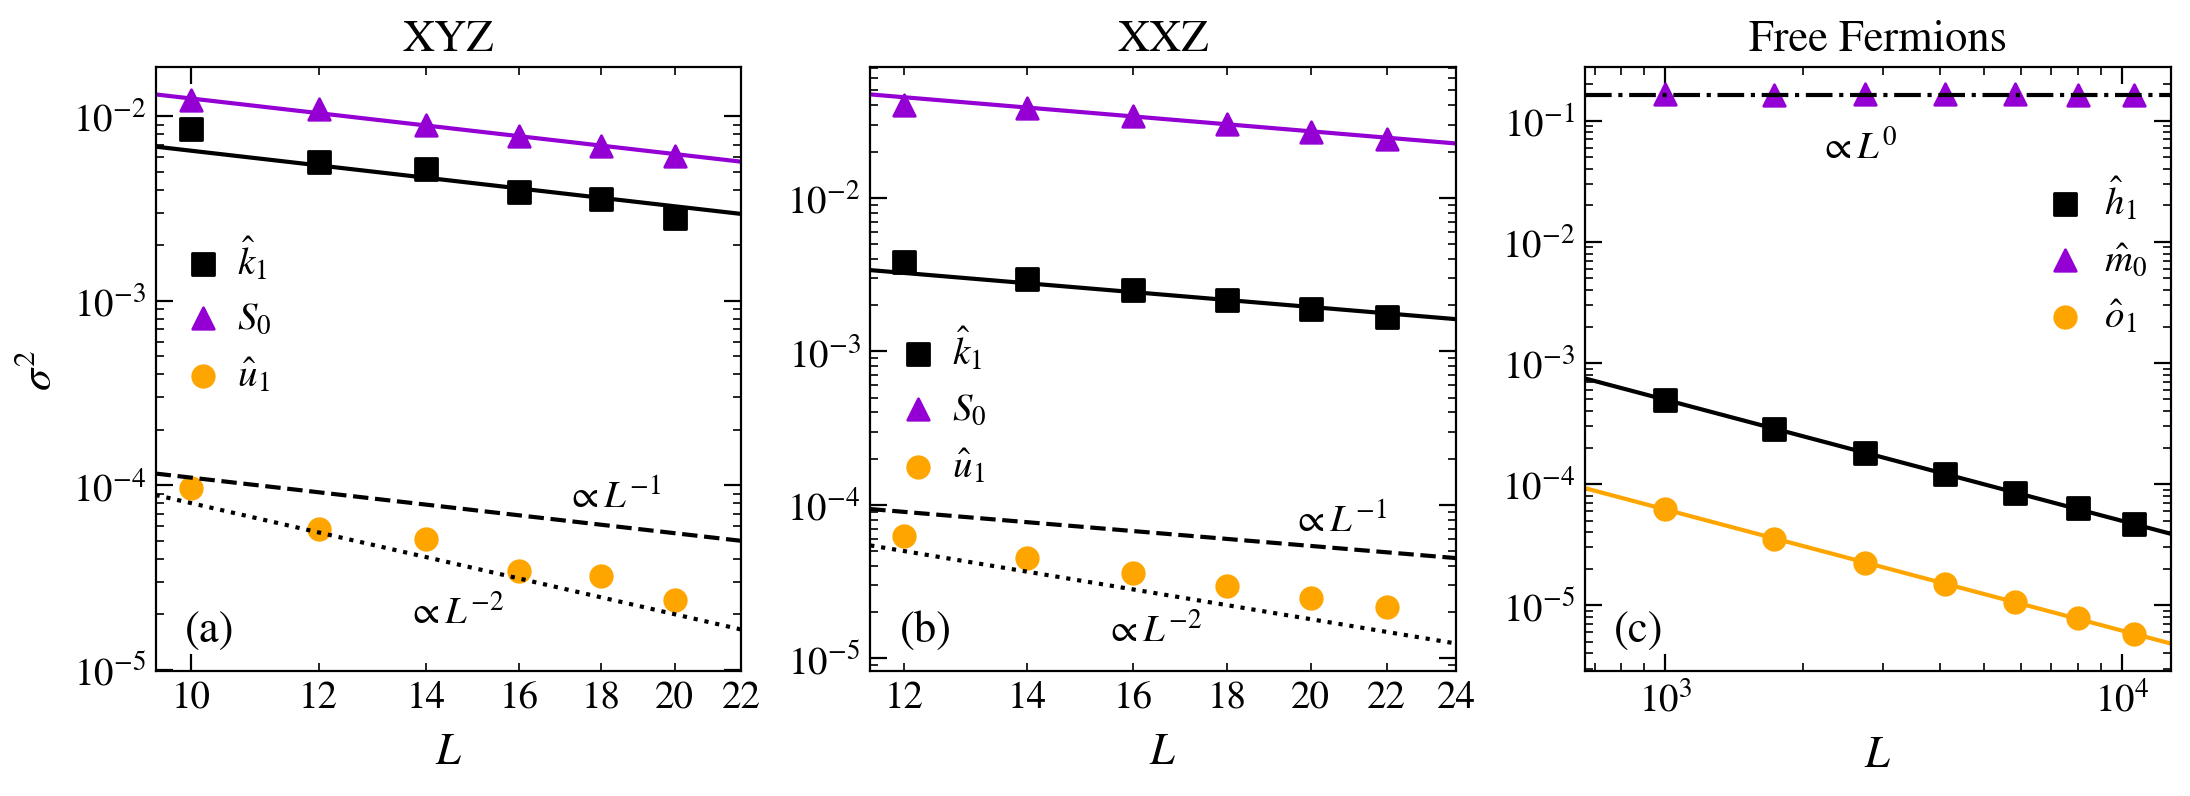

In [11]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
BOUNDARY_COND = 'OBC'
base_dir = "../../XYZ/results/" + ("symmetries/") + BOUNDARY_COND + '/'

fig, axis = plt.subplots( nrows=1, ncols=3, figsize=(13,4), dpi = 200)

L=22
J1=1.0
d1=0.2
e1=0.2

REAL_SECTORS = 0
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

markers_ls = ['s','^','o', 'o', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)
colors_ls = ['black', 'darkviolet', 'orange', 'green']
colors = itertools.cycle(colors_ls)

def plot_data(axis, x, y, label = "", empty=False, plot_fit = False):
    # y = y / y[0]
    colo = next(colors)
    
    # axis.plot(x, y, marker=next(markers), color = colo, label=label, markerfacecolor='None' if empty else colo, markersize=8, lw=0)
    axis.scatter(x, y, marker=next(markers), color = colo, label=label, facecolor=colo if empty else colo, s=60)
    alffa =0
    if plot_fit:
    
        if not any(np.isnan(y)) and not (all(np.abs(y) < 1e-14)):
            def func(x, a):
                return a / x
            fitter = func
            pars, pconv = fit(fitter,
                            xdata = x[-4:],
                            ydata = y[-4:])
            
            print(label, pars, x[-4:])
            alffa = pars[0]
            xval = np.linspace(min(x)-0.5, max(x)+2, 100)
            axis.plot(xval, fitter(xval, *pars), ls='-', color=colo)#, label=r"$\sim L^{%.2f}$"%pars[0])
        
        return alffa
    

print("\n--------------------------------- XYZ")
# XYZ
sizes = (np.arange(14, 25, 2) if REAL_SECTORS else np.arange(14, 24, 2)) if BOUNDARY_COND == 'PBC' else np.arange(10, 21, 2)

Sq0 = np.zeros(sizes.shape)
jE = np.zeros(sizes.shape)
Kin = np.zeros(sizes.shape)
Kin2 = np.zeros(sizes.shape)
Int = np.zeros(sizes.shape)
Kin_loc = np.zeros(sizes.shape)
Kin2_loc = np.zeros(sizes.shape)
Int_loc = np.zeros(sizes.shape)


folder_base = f'../../XYZ/Jupyter_Python/matrix_elements/'
folder = folder_base + BOUNDARY_COND + '/'
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)

filenamee = folder + (f'variance_eta={e1},delta={d1}_reals.csv' if REAL_SECTORS and BOUNDARY_COND == 'PBC' else f'variance_eta={e1},delta={d1}.csv')
if exists(filenamee):
    df = pd.read_csv(filenamee)
    
    sizes = np.array(df['sizes'])
    Sq0 = np.array(df['Sq0'])
    jE = np.array(df['jE'])
    Kin = np.array(df['Kin'])
    Kin2 = np.array(df['Kin2'])
    Int = np.array(df['Int'])
    Kin_loc = np.array(df['Kin_loc'])
    Kin2_loc = np.array(df['Kin2_loc'])
    Int_loc = np.array(df['Int_loc'])
    
else:
    print(filenamee)


# ----------------- RESCALE DATA
# Int = Int * sizes * 16 / (sizes - 1)
# Kin = Kin * sizes * 2 / (sizes - 1)
# Kin2 = Kin2 * sizes * 2 / (sizes - 1)
# Sq0 = Sq0 * np.sqrt(2)

# -----------------


colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)
# plot_data(axis[0][1], sizes, Kin  / 2   , label=r"$\mathcal{O}=K$", alfa=0)
# plot_data(axis[0][1], sizes, Kin2 / 2   , label=r"$\mathcal{O}=K^{(2)}$", alfa=0)
# plot_data(axis[0][1], sizes, Int  / 16   , label=r"$\mathcal{O}=U$", alfa=0)

colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)
alfa = plot_data(axis[0], sizes, Kin_loc / 2, label=r"$\hat{k}_1$", plot_fit=True)
# axis[0].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.6, 0.65), xycoords='axes fraction')

alfa = plot_data(axis[0], sizes, Sq0 / 2, label=r"$S_0$", plot_fit=True)#, label=r"$S_0$")
# axis[0].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.75, 0.9), xycoords='axes fraction')

plot_data(axis[0], sizes, Int_loc / 16, label=r"$\hat{u}_1$")


Ls = np.linspace(sizes[0] - 0.5, 24, 100)
axis[0].plot(Ls, 1.1e-4/(Ls/10), ls='--', c='k')
axis[0].plot(Ls, 8e-5/(Ls/10)**2, ls=':', c='k')
axis[0].annotate(r"$\propto L^{-1}$", fontsize=14, xy=(0.7, 0.27), xycoords='axes fraction')
axis[0].annotate(r"$\propto L^{-2}$", fontsize=14, xy=(0.43, 0.08), xycoords='axes fraction')

fig_help.set_plot_elements(axis[0], ylabel=r"$\sigma^2$", xlabel=r"$L$", font_size=14, set_legend=False, yscale='log', xscale='log', xlim=(None, sizes[-1]+2))
axis[0].legend(frameon=0, fontsize=14, loc='lower left', ncol=1, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,0.4))

   
print("\n--------------------------------- XXZ") 
# XXZ
d1=0.55
sizes = (np.arange(14, 26, 2) if REAL_SECTORS else np.arange(14, 26, 2)) if BOUNDARY_COND == 'PBC' else np.arange(12, 23, 2)

Sq0 = np.zeros(sizes.shape)
jE = np.zeros(sizes.shape)
Kin = np.zeros(sizes.shape)
Kin2 = np.zeros(sizes.shape)
Int = np.zeros(sizes.shape)
Kin_loc = np.zeros(sizes.shape)
Kin2_loc = np.zeros(sizes.shape)
Int_loc = np.zeros(sizes.shape)


folder_base = f'../../XYZ/Jupyter_Python/matrix_elements/XXZ/'
folder = folder_base + BOUNDARY_COND + '/'
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)

filenamee = folder + (f'variance_delta={d1}_reals.csv' if REAL_SECTORS and BOUNDARY_COND == 'PBC' else f'variance_delta={d1}.csv')
if exists(filenamee):
    df = pd.read_csv(filenamee)
    
    sizes = np.array(df['sizes'])
    Sq0 = np.array(df['Sq0'])
    jE = np.array(df['jE'])
    Kin = np.array(df['Kin'])
    Kin2 = np.array(df['Kin2'])
    Int = np.array(df['Int'])
    Kin_loc = np.array(df['Kin_loc'])
    Kin2_loc = np.array(df['Kin2_loc'])
    Int_loc = np.array(df['Int_loc'])
    
else:
    print(filenamee)


Ls = np.linspace(sizes[0] - 0.5, 24, 100)
axis[1].plot(Ls, 9e-5/(Ls/12), ls='--', c='k')
axis[1].plot(Ls, 5e-5/(Ls/12)**2, ls=':', c='k')
axis[1].annotate(r"$\propto L^{-1}$", fontsize=14, xy=(0.72, 0.23), xycoords='axes fraction')
axis[1].annotate(r"$\propto L^{-2}$", fontsize=14, xy=(0.4, 0.05), xycoords='axes fraction')

colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)

colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)
alfa = plot_data(axis[1], sizes, Kin_loc / 2, label=r"$\hat{k}_1$", plot_fit=True)
# axis[1].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.6, 0.5), xycoords='axes fraction')

alfa = plot_data(axis[1], sizes, Sq0 / 2, label=r"$S_0$", plot_fit=True)
# axis[1].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.7, 0.77), xycoords='axes fraction')

plot_data(axis[1], sizes, Int_loc / 16, label=r"$\hat{u}_1$")

yscale = 'log'
xscale = 'log'

fig_help.set_plot_elements(axis[1], ylabel="", xlabel=r"$L$", font_size=14, set_legend=False, yscale='log', xscale='log', xlim=(None, sizes[-1]+2))
axis[1].legend(frameon=0, fontsize=14, loc='lower left', ncol=1, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,0.25))


for ax in axis:
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    # ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    # ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].set_xlim(9.5, 22)
axis[1].set_xlim(11.5, 24)

fig.subplots_adjust(wspace = 0.2, hspace=0.1)

axis[0].annotate(r"(a)", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
axis[2].annotate(r"(c)", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')

# sizes = np.array([100, 500, 1000, 2000, 5000, 10000, 16000])
sizes = np.linspace(10, 22, 7)**3
V = sizes**DIM
def plot_data(axis, x, y, legend = False, label = "", empty=False, plot_fit = True):
    # y = y / y[0]
    colo = next(colors)
    # x=x[:-1]
    # y=y[:-1]
    axis.scatter(x, y, marker=next(markers), color = colo, label=label, facecolor=colo if empty else colo, s=60)

    linestyle = '-' if empty else '-'
    if plot_fit and not any(np.isnan(y)) and not (all(np.abs(y) < 1e-14)):
        def func(x, a):
                return a / x
        fitter = func
        pars, pconv = fit(fitter,
                        xdata = x[-4:],
                        ydata = y[-4:],
                        maxfev = 600)
        
        print(label, pars, x[-5:])
        alfa = pars[0]
        xval = np.linspace(min(V)/1.5, 1.2*max(V), 100)
        axis.plot(xval, fitter(xval, *pars), ls=linestyle, color=colo)#, label=r"$\sim L^{%.2f}$"%pars[0])
        return alfa
    


colors = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)
alfa = plot_data(axis[2], V, T_nn_loc, True, r"$\hat{h}_1$", empty=True)
# axis[2].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.55, 0.45), xycoords='axes fraction')

xval = np.linspace(min(V)/1.5, 1.2*max(V), 100)
alfa = plot_data(axis[2], V, m0, True, r"$\hat{m}_0$", empty=True, plot_fit=False)
axis[2].plot(xval, [np.mean(m0)] * xval.size, ls='-.', c='k')
axis[2].annotate(r"$\propto L^{0}$", fontsize=14, xy=(0.4, 0.85), xycoords='axes fraction')

alfa = plot_data(axis[2], V, U_nn_loc, True, r"$\hat{o}_1$", empty=True)
# axis[2].annotate(r"$\propto V^{%.2f}$"%alfa, fontsize=14, xy=(0.5, 0.1), xycoords='axes fraction')


fig_help.set_plot_elements(axis[2], ylabel=r"", xlabel=r"$L$", font_size=14, set_legend=False, yscale='log', xscale='log', xlim=(min(xval), max(xval)) )
fig_help.set_legend(axis[2], loc='upper right', fontsize=14, anchor=(1.02, 0.88))


# axis[0][1].yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
# axis[0][1].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].set_title(r"XYZ", fontsize=16)
axis[1].set_title(r"XXZ", fontsize=16)
axis[2].set_title(r"Free Fermions", fontsize=16)


# axis[0][1].set_ylim(0.5 * min(T_nnn), 2 * max(T_nnn))

fig.subplots_adjust(wspace = 0.22, hspace=0.05)

plt.savefig("Fig8.pdf", bbox_inches = 'tight', pad_inches=0.02)
plt.savefig("Fig8.png", bbox_inches = 'tight', pad_inches=0.02)